In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# Import necessary modules
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

# Create an engine to connect to the SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Reflect the database tables
Base = automap_base()
Base.prepare(autoload_with=engine)

# Save references to the classes (tables) mapped by automap
Station = Base.classes.station
Measurement = Base.classes.measurement

# Verify that the classes have been mapped correctly
print(Base.classes.keys())


['measurement', 'station']


In [12]:
# reflect an existing database into a new model
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

# Step 1: Create the engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Step 2: Reflect the database tables
Base = automap_base()
Base.prepare(autoload_with=engine)

# Step 3: Map the classes
Station = Base.classes.station
Measurement = Base.classes.measurement

# Step 4: Verify the mapping
print(Base.classes.keys())

# Step 5: Create a session
session = Session(engine)


# reflect the tables


['measurement', 'station']


In [14]:
# View all of the classes that automap found
# Import necessary modules
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

# Create an engine to connect to the SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Reflect the database tables
Base = automap_base()
Base.prepare(autoload_with=engine)

# View all of the classes that automap found
print(Base.classes.keys())



['measurement', 'station']


In [16]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [18]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(f"The most recent date in the dataset is: {most_recent_date}")

The most recent date in the dataset is: 2017-08-23


In [23]:
from sqlalchemy import func
import datetime as dt

# Step 1: Find the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).scalar()

# Convert the string date to a datetime object
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the date one year before the most recent date
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Step 2: Query the last 12 months of precipitation data
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Convert the query results to a Pandas DataFrame
import pandas as pd

precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])

# Drop rows with missing values
precipitation_df = precipitation_df.dropna()

# Set the date column as the DataFrame index
precipitation_df.set_index('date', inplace=True)

# Display the first few rows of the DataFrame
precipitation_df.head()


,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


In [25]:
# Query to retrieve the last 12 months of precipitation data
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.date <= most_recent_date).\
    order_by(Measurement.date).all()

# Convert the query results to a Pandas DataFrame
import pandas as pd

precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])

# Drop rows with missing values
precipitation_df = precipitation_df.dropna()

# Set the date column as the DataFrame index
#precipitation_df.set_index('date', inplace=True)

# Display the first few rows of the DataFrame
precipitation_df.head()


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15


Text(0, 0.5, 'Precipitation (inches)')

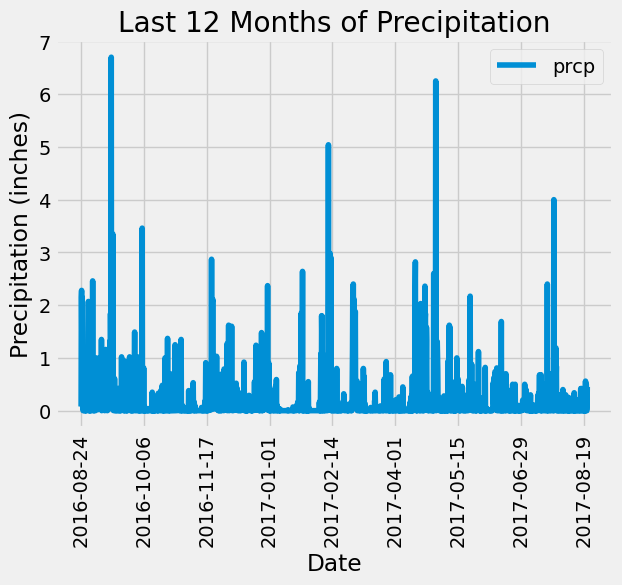

In [27]:
import matplotlib.pyplot as plt

# Step 3: Plot the results
precipitation_df.plot(x = 'date', y = 'prcp', rot = 90 )

#plt.figure(figsize=(10, 6))
#plt.plot(precipitation_df.index, precipitation_df['prcp'], color='b', linewidth=2)
plt.title("Last 12 Months of Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()


In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Calculate summary statistics for the precipitation data
summary_statistics = precipitation_df['prcp'].describe()

# Display the summary statistics
print(summary_statistics)


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()


[(9,)]

In [34]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
              group_by(Measurement.station).\
              order_by(func.count(Measurement.station).desc()).\
              all()
              
        


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# USC00519281
from sqlalchemy import func

# Query to calculate the minimum, maximum, and average temperature
results = session.query(func.min(Measurement.tobs), 
                        func.max(Measurement.tobs), 
                        func.avg(Measurement.tobs)).\
                        filter(Measurement.station == 'USC00519281').all()

# Display the results
min_temp, max_temp, avg_temp = results[0]
print(f"Lowest Temperature: {min_temp}")
print(f"Highest Temperature: {max_temp}")
print(f"Average Temperature: {avg_temp}")



Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


Last date in dataset: 2017-08-23 00:00:00
Date one year ago: 2016-08-23 00:00:00


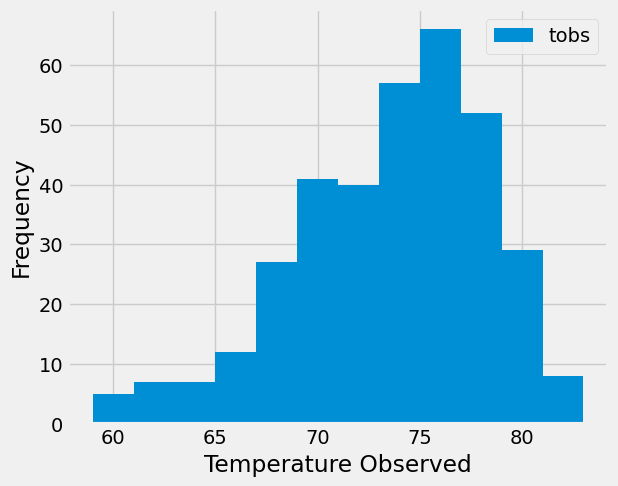

In [42]:
# Using the most active station id - 'USC00519281'
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Calculate the date one year from the last data set
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'session' is already defined and connected to your database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Convert last_date to datetime object
last_date = dt.datetime.strptime(last_date, '%Y-%m-%d')

# Calculate the date one year before the last date
one_year_ago = last_date - dt.timedelta(days=365)

print(f"Last date in dataset: {last_date}")
print(f"Date one year ago: {one_year_ago}")

# Query for temperature observations
results = session.query(Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date >= one_year_ago).all()

# Create a DataFrame
resultsDF = pd.DataFrame(results, columns=['tobs'])

# Plot the data
resultsDF.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel('Temperature Observed')
plt.show()





# Close Session

In [45]:
# Close Session
session.close()